## **UNAD** 
## **Tarea 3** - **Analisis de datos.**
## **Algoritmos de Aprendizaje Supervisado.**
## Grupo Colaborativo 202016908A_1704. 

**Regresión Lineal Dataset Carros.**

## Pasos de la Actividad:
1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.
9.  Crear una cuenta en GitHub y cargar los códigos de los modelos
diseñados https://github.com/

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [243]:
#Cargue de librerias.  

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [238]:
Datos_Enfermedades_Cardiacas = pd.read_csv('C:/Users/sopor/OneDrive - Universidad Nacional Abierta y a Distancia/ANALISIS DE DATOS/Entrega 3/Dataset/Enfermedades_Cardiacas_UCI_Cleveland.csv')

In [240]:
# Datos en Python para el EDA. 
Datos_Enfermedades_Cardiacas.head(303)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


Text(0.5, 1.0, 'Identificación de los Datos Faltantes y Atipicos Para Datos_Enfermedades_Cardiacas.')

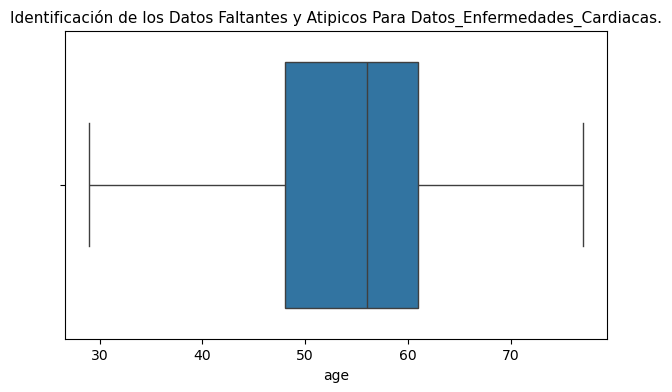

In [165]:
#Datos Faltantes y Atipicos Datos Enfermedades Cardiacas. 
plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos_Enfermedades_Cardiacas['age'])
plt.title('Identificación de los Datos Faltantes y Atipicos Para Datos_Enfermedades_Cardiacas.', fontsize=11)

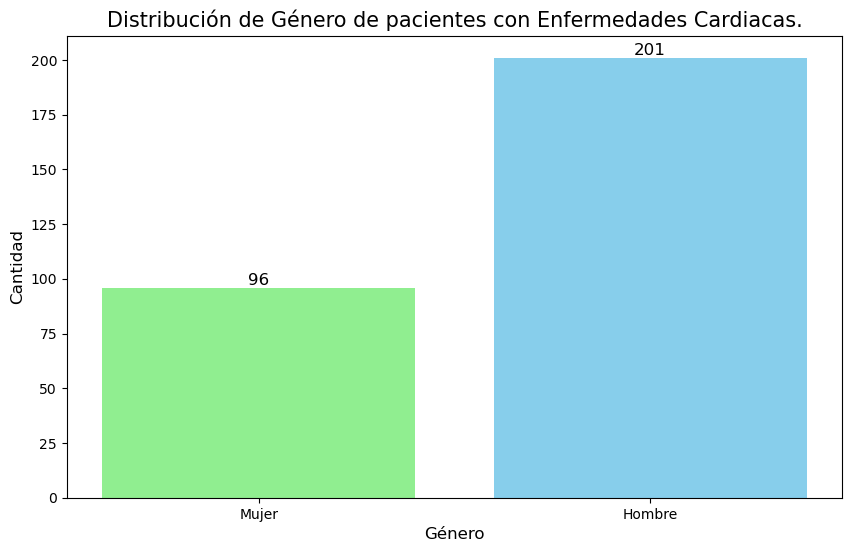

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
Datos_Enfermedades_Cardiacas = pd.read_csv('C:/Users/sopor/OneDrive - Universidad Nacional Abierta y a Distancia/ANALISIS DE DATOS/Entrega 3/Dataset/Enfermedades_Cardiacas_UCI_Cleveland.csv')

# Contar los valores en la columna 'sex'
genero = Datos_Enfermedades_Cardiacas['sex'].value_counts()

# Configuración y creación del gráfico
plt.figure(figsize=(10, 6))
plt.bar(genero.index, genero.values, color=['skyblue', 'lightgreen'])

plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Género de pacientes con Enfermedades Cardiacas.', fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Mujer", "Hombre"])

for i, valor in enumerate(genero.values):
    plt.annotate(str(valor), xy=(genero.index[i], valor), ha='center', va='bottom', fontsize=12)
    
# Mostrar el gráfico
plt.show()


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [170]:
#Revision de datos faltantes.  

print("Numero de Registros con cero en Edad: ", Datos_Enfermedades_Cardiacas['age'].isin([0]).sum())
print("Numero de Registros con cero en Sexo: ", Datos_Enfermedades_Cardiacas['sex'].isin([0]).sum())
print("Numero de Registros con cero en Dolor de Pecho (cp): ", Datos_Enfermedades_Cardiacas['cp'].isin([0]).sum())
print("Numero de Registros con cero en Presion Arterial en Reposo (trestbps): ", Datos_Enfermedades_Cardiacas['trestbps'].isin([0]).sum())
print("Numero de Registros con cero en Colesterol (chol): ", Datos_Enfermedades_Cardiacas['chol'].isin([0]).sum())
print("Numero de Registros con cero en Azúcar en Ayunas (fbs): ", Datos_Enfermedades_Cardiacas['fbs'].isin([0]).sum())
print("Numero de Registros con cero en ECG en Reposo (restecg): ", Datos_Enfermedades_Cardiacas['restecg'].isin([0]).sum())
print("Numero de Registros con cero en Frecuencia Cardiaca Máxima (thalach): ", Datos_Enfermedades_Cardiacas['thalach'].isin([0]).sum())
print("Numero de Registros con cero en Angina Inducida (exang): ", Datos_Enfermedades_Cardiacas['exang'].isin([0]).sum())
print("Numero de Registros con cero en ST (oldpeak): ", Datos_Enfermedades_Cardiacas['oldpeak'].isin([0]).sum())
print("Numero de Registros con cero en Pendiente ST (slope): ", Datos_Enfermedades_Cardiacas['slope'].isin([0]).sum())
print("Numero de Registros con cero en Vasos Principales (ca): ", Datos_Enfermedades_Cardiacas['ca'].isin([0]).sum())
print("Numero de Registros con cero en Talasemia (thal): ", Datos_Enfermedades_Cardiacas['thal'].isin([0]).sum())
print("Numero de Registros con cero en Condición Cardíaca (condition): ", Datos_Enfermedades_Cardiacas['condition'].isin([0]).sum())


Numero de Registros con cero en Edad:  0
Numero de Registros con cero en Sexo:  96
Numero de Registros con cero en Dolor de Pecho (cp):  23
Numero de Registros con cero en Presion Arterial en Reposo (trestbps):  0
Numero de Registros con cero en Colesterol (chol):  0
Numero de Registros con cero en Azúcar en Ayunas (fbs):  254
Numero de Registros con cero en ECG en Reposo (restecg):  147
Numero de Registros con cero en Frecuencia Cardiaca Máxima (thalach):  0
Numero de Registros con cero en Angina Inducida (exang):  200
Numero de Registros con cero en ST (oldpeak):  96
Numero de Registros con cero en Pendiente ST (slope):  139
Numero de Registros con cero en Vasos Principales (ca):  174
Numero de Registros con cero en Talasemia (thal):  164
Numero de Registros con cero en Condición Cardíaca (condition):  160


In [172]:
#Proceder a imputar todos los datos en ceros con el valor medio de la columna. 

Datos_Enfermedades_Cardiacas['cp']=Datos_Enfermedades_Cardiacas['cp'].replace(0,Datos_Enfermedades_Cardiacas['cp'].mean())
Datos_Enfermedades_Cardiacas['fbs']=Datos_Enfermedades_Cardiacas['fbs'].replace(0,Datos_Enfermedades_Cardiacas['fbs'].mean())
Datos_Enfermedades_Cardiacas['restecg']=Datos_Enfermedades_Cardiacas['restecg'].replace(0,Datos_Enfermedades_Cardiacas['restecg'].mean())
Datos_Enfermedades_Cardiacas['exang']=Datos_Enfermedades_Cardiacas['exang'].replace(0,Datos_Enfermedades_Cardiacas['exang'].mean())
Datos_Enfermedades_Cardiacas['oldpeak']=Datos_Enfermedades_Cardiacas['oldpeak'].replace(0,Datos_Enfermedades_Cardiacas['oldpeak'].mean())
Datos_Enfermedades_Cardiacas['slope']=Datos_Enfermedades_Cardiacas['slope'].replace(0,Datos_Enfermedades_Cardiacas['slope'].mean())
Datos_Enfermedades_Cardiacas['ca']=Datos_Enfermedades_Cardiacas['ca'].replace(0,Datos_Enfermedades_Cardiacas['ca'].mean())
Datos_Enfermedades_Cardiacas['thal']=Datos_Enfermedades_Cardiacas['thal'].replace(0,Datos_Enfermedades_Cardiacas['thal'].mean())

In [174]:
#Nueva revision de datos faltantes. 
print("Numero de Registros con cero en Edad: ", Datos_Enfermedades_Cardiacas['age'].isin([0]).sum())
print("Numero de Registros con cero en Sexo: ", Datos_Enfermedades_Cardiacas['sex'].isin([0]).sum())
print("Numero de Registros con cero en Dolor de Pecho (cp): ", Datos_Enfermedades_Cardiacas['cp'].isin([0]).sum())
print("Numero de Registros con cero en Presion Arterial en Reposo (trestbps): ", Datos_Enfermedades_Cardiacas['trestbps'].isin([0]).sum())
print("Numero de Registros con cero en Colesterol (chol): ", Datos_Enfermedades_Cardiacas['chol'].isin([0]).sum())
print("Numero de Registros con cero en Azúcar en Ayunas (fbs): ", Datos_Enfermedades_Cardiacas['fbs'].isin([0]).sum())
print("Numero de Registros con cero en ECG en Reposo (restecg): ", Datos_Enfermedades_Cardiacas['restecg'].isin([0]).sum())
print("Numero de Registros con cero en Frecuencia Cardiaca Máxima (thalach): ", Datos_Enfermedades_Cardiacas['thalach'].isin([0]).sum())
print("Numero de Registros con cero en Angina Inducida (exang): ", Datos_Enfermedades_Cardiacas['exang'].isin([0]).sum())
print("Numero de Registros con cero en ST (oldpeak): ", Datos_Enfermedades_Cardiacas['oldpeak'].isin([0]).sum())
print("Numero de Registros con cero en Pendiente ST (slope): ", Datos_Enfermedades_Cardiacas['slope'].isin([0]).sum())
print("Numero de Registros con cero en Vasos Principales (ca): ", Datos_Enfermedades_Cardiacas['ca'].isin([0]).sum())
print("Numero de Registros con cero en Talasemia (thal): ", Datos_Enfermedades_Cardiacas['thal'].isin([0]).sum())
print("Numero de Registros con cero en Condición Cardíaca (condition): ", Datos_Enfermedades_Cardiacas['condition'].isin([0]).sum())

Numero de Registros con cero en Edad:  0
Numero de Registros con cero en Sexo:  96
Numero de Registros con cero en Dolor de Pecho (cp):  0
Numero de Registros con cero en Presion Arterial en Reposo (trestbps):  0
Numero de Registros con cero en Colesterol (chol):  0
Numero de Registros con cero en Azúcar en Ayunas (fbs):  0
Numero de Registros con cero en ECG en Reposo (restecg):  0
Numero de Registros con cero en Frecuencia Cardiaca Máxima (thalach):  0
Numero de Registros con cero en Angina Inducida (exang):  0
Numero de Registros con cero en ST (oldpeak):  0
Numero de Registros con cero en Pendiente ST (slope):  0
Numero de Registros con cero en Vasos Principales (ca):  0
Numero de Registros con cero en Talasemia (thal):  0
Numero de Registros con cero en Condición Cardíaca (condition):  160


Text(0.5, 1.0, 'Identificación de Datos Atipicos.')

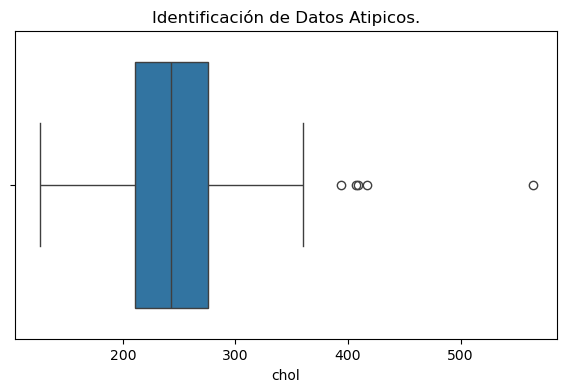

In [176]:
#Datos Atipicos.  
plt.figure(figsize=(7,4))
sns.boxplot(x=Datos_Enfermedades_Cardiacas['chol'])
plt.title('Identificación de Datos Atipicos.',fontsize=12)

In [178]:
#Contador de Datos Atipicos.  
nivel_minimo=200
nivel_maximo=240
Total_Atipico=((Datos_Enfermedades_Cardiacas['chol']<nivel_minimo)|(Datos_Enfermedades_Cardiacas['chol']>nivel_maximo)).sum()
print("Los datos atipicos de la columna chol es de {}.".format(Total_Atipico))

Los datos atipicos de la columna chol es de 199.


In [180]:
#Filtrar
Datos_Enfermedades_Cardiacas=Datos_Enfermedades_Cardiacas[(Datos_Enfermedades_Cardiacas['chol']<nivel_maximo)&(Datos_Enfermedades_Cardiacas['chol']>nivel_minimo)]

In [182]:
#Validar si los datos fueron removidos.  
Total_Atipico=((Datos_Enfermedades_Cardiacas['chol']<nivel_minimo)|(Datos_Enfermedades_Cardiacas['chol']>nivel_maximo)).sum()
print("El Total de Datos Atipicos es {}.".format(Total_Atipico))

El Total de Datos Atipicos es 0.


In [184]:
#Revision de Tipo de datos y datos faltantes.  
Datos_Enfermedades_Cardiacas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 0 to 293
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        93 non-null     int64  
 1   sex        93 non-null     int64  
 2   cp         93 non-null     float64
 3   trestbps   93 non-null     int64  
 4   chol       93 non-null     int64  
 5   fbs        93 non-null     float64
 6   restecg    93 non-null     float64
 7   thalach    93 non-null     int64  
 8   exang      93 non-null     float64
 9   oldpeak    93 non-null     float64
 10  slope      93 non-null     float64
 11  ca         93 non-null     float64
 12  thal       93 non-null     float64
 13  condition  93 non-null     int64  
dtypes: float64(8), int64(6)
memory usage: 10.9 KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristicas de Interes.
* Enfermedades Cardiacas "EC": Si tiene una EC o no tiene una EC. (0 es no tiene y 1 si tiene).
* Vamos a predecir si una persona puede llegar a tener una Enfermedad Cardiaca.  

**Personas con Enfermedades Cardiacas.**  

In [250]:
Datos_Enfermedades_Cardiacas['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [248]:
Datos_Enfermedades_Cardiacas[['condition']].head(20)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.  

In [194]:
# Train (75%) - Test (25%).  
X = Datos_Enfermedades_Cardiacas.drop('condition',axis=1)
Y = Datos_Enfermedades_Cardiacas['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify=Y,random_state=0)

In [196]:
print(X_train)

     age  sex   cp  trestbps  chol       fbs   restecg  thalach     exang  \
141   44    1  2.0       120   226  0.144781  0.996633      169  0.326599   
207   59    1  3.0       135   234  0.144781  0.996633      161  0.326599   
289   42    1  3.0       140   226  0.144781  0.996633      178  0.326599   
111   54    1  2.0       150   232  0.144781  2.000000      165  0.326599   
118   51    1  2.0       100   222  0.144781  0.996633      143  1.000000   
..   ...  ...  ...       ...   ...       ...       ...      ...       ...   
77    68    0  2.0       120   211  0.144781  2.000000      115  0.326599   
275   45    1  3.0       104   208  0.144781  2.000000      148  1.000000   
208   59    1  3.0       110   239  0.144781  2.000000      142  1.000000   
142   43    0  2.0       122   213  0.144781  0.996633      165  0.326599   
256   52    1  3.0       108   233  1.000000  0.996633      147  0.326599   

      oldpeak     slope        ca      thal  
141  1.055556  0.602694  0.67

In [198]:
print(Y_train)

141    0
207    0
289    0
111    0
118    0
      ..
77     0
275    0
208    1
142    0
256    0
Name: condition, Length: 69, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros. 

In [253]:
#Construcción del modelo de Regresión Lineal.
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit (X_train , Y_train)

#Creación de modelo de predicción.  
Prediccion_clases = [1 if prob >= 0.5 else 0 for prob in Prediccion]
Prediccion = modelo_regresion_lineal.predict(X_test)

In [203]:
print(Y_test)

103    1
214    1
293    1
0      0
17     0
66     0
154    0
12     1
100    1
4      0
38     0
170    1
71     0
97     0
52     1
253    0
145    0
90     0
35     1
167    1
271    0
219    1
227    0
276    0
Name: condition, dtype: int64


In [205]:
print(Prediccion_clases)

[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como presición, recall, F1-score, etc.  

In [208]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Prediccion_clases))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.78      0.70      0.74        10

    accuracy                           0.79        24
   macro avg       0.79      0.78      0.78        24
weighted avg       0.79      0.79      0.79        24



## 7. Realizar las diferentes graficas que permitan visualizar los resultados del modelo.  

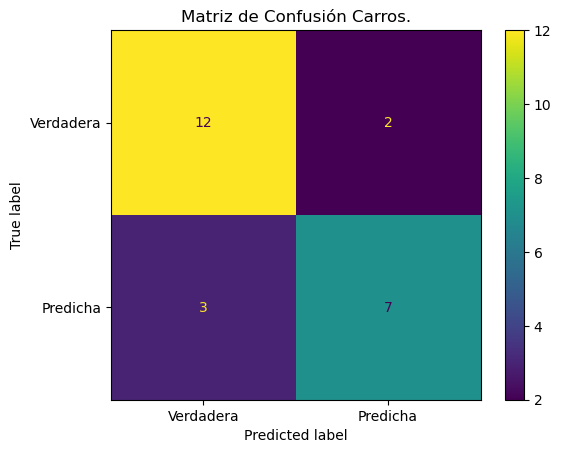

In [259]:
from sklearn import metrics

cm=confusion_matrix(Y_test,Prediccion_clases)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Verdadera', 'Predicha'])
disp.plot()
plt.title('Matriz de Confusión Carros.')
plt.show()

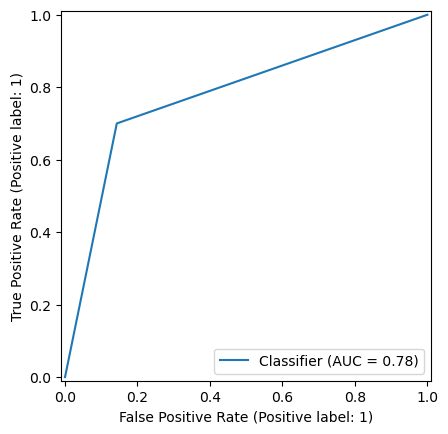

In [219]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(Y_test, Prediccion_clases)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos. 

En cuanto al desempeño del modelo se puedes afirmar lo siguiente:  
* Presición: El 14% o 0.14 como se muestra en el modelo de desempeño, conforma que solo este porcentaje de ventas realizadas por un vendedor propio del concesionario.
* Recall: En el modelo de desempeño indica que el modelo identico corresponde a un 0.07 o 7% de las ventas son con el dueño directamente.
* F1-score: Dentro de este item, la puntuacion de la venta de carros es de 0.10 o 10%, indicando un balance entre precision y recall.

Matriz de Confusión:  
El modelo tiene un rendimiento bastante sólido, pero hay margen de mejora, especialmente en la exhaustividad, ya que el 30% de los casos positivos reales no se están detectando.
Podrías considerar ajustar el umbral de clasificación o explorar técnicas adicionales para mejorar el recall

Curva de Presición: 
Para la curva de presición en AUC corresponde a un 0.78 o 78% de los datos suministradsr son datos correctos.  
